<a href="https://colab.research.google.com/github/yul-codes/DA_homework/blob/main/AB_hw_2_Kuznetsova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='teal'>*1. Что такое ошибка первого и второго рода?*</font>

<u>Ошибка 1 рода</u> - явление в статистике, когда при эксперименте/проверке гипотез нулевая гипотеза отвергается, когда на самом деле она верна - (false positive). Можно интерпретировать как ложную тревогу.


<u>Ошибка 2 рода</u> - явление в статистике, когда при эксперименте/проверке гипотез не возникает оснований отвергнуть нулевую гипотезу (т.е. она принимается), когда на самом деле верна альтернативная гипотеза (false negative). Можно интерпретировать как упущенную возможность или халатную беспечность.

<font color='teal'>*2. Объясните ошибку первого и второго рода на примере теста на коронавирус.*</font>

<u>Ошибка 1 рода</u> - человек не был заражен коронавирусом, а тест показал (ложно)положительный результат.


<u>Ошибка 2 рода</u> - человек был заражен коронавирусом, а тест этого не вявил и показал (ложно)отрицательный результат.

На данном примере отчетливо видна разница двух ошибок в их последствиях. Если в первом случае человек будет изолирован на карантин/сядет на больничный, что может доставить ему некоторые трудности и вызвать изменение планов, во втором остался невыявленным вирус, который теперь может быть распространен дальше на бОльшую группу людей, в том числе среди находящихся в группе риска, т.е. урон от ошибки второго рода выше.



<font color='teal'>*3. Объясните ошибку первого и второго рода с точки зрения продуктового аналитика и новой фичи в продукте.*</font>

<u>Ошибка 1 рода</u> - тестирование выявило изменения в поведении пользователей в тестовой группе по сравнению с контрольной группой, но на самом деле существенных изменений и разницы нет, либо они были получены случайным стечением обстоятельств, не относящимся напрямую к эффективности новой фичи. Ошибка первого рода может привести к тому, что будут потрачены ресурсы на внедрение нового функционала, хотя на самом деле он не приносит каких-либо значимых улучшений.

<u>Ошибка 2 рода</u> - новая фича, доступая тестовой группе, имеет значимый эффект на поведение пользователей по сравнению с базовым функционалом, доступным контрольной группе, но тестирование этого изменения не выявило и не показало. Ошибка второго рода может привести к упущенной возможности улучшить продукт и пользовательский опыт, т.к. нулевая гипотеза об отсутствии изменений не была опровергнута.

<font color='teal'>*4. При проведении a/b-теста с мощностью 90% и уровнем значимости 2%, какова вероятность совершить ошибку первого рода? А ошибку второго рода?*</font>

Вероятность ошибки первого рода равна уровню значимости $\alpha$. В данном примере вероятность ошибки первого рода будет равна 2%.

Вероятность ошибка второго рода рассчитывается как $1 - \beta$, где $\beta$ - мощность теста. В данном примере вероятность ошибки второго рода будет равна 10%.

<font color='teal'>*5. Что представляет собой MDE? Как связано значение MDE с размером выборки? Чем больше выборка, тем что?*</font>

MDE (minimum detectable effect) - это минимально обнаружимый эффект, который представляется целью выявить при проведении А/Б тестирования. Это то значение изменения, например, в поведении пользователей, которое мы хотим выявить в тестовой группе с новым функционалом.

MDE чувствителен к размеру выборок - чем меньше MDE, тем больше должна быть выборка, чтобы его выявить (или не выявить). Чем выше MDE, тем меньше необходима выборка для эксперимента.

<font color='teal'>*6. Используя код из [ноутбука](https://drive.google.com/file/d/1XX_OhIIa8FNA5XE1RT8RgMpv47-cHM5-/view?usp=drive_link) расcчитайте размер выборки для:*</font>

- <font color='teal'>*baseline = 0.09 – текущая конверсия в продукте*</font>

- <font color='teal'>*mde = 0.02 # минимально обнаружимый эффект (MDE)*</font>

- <font color='teal'>*power = 0.80 # мощность*</font>

- <font color='teal'>*alpha = 0.02 # уровень значимости*</font>

In [ ]:
import numpy as np
from statsmodels.stats.power import NormalIndPower
import statsmodels.api as sm

baseline = 0.09 # текущая конверсия в продукте
mde = 0.02
ratio = 1 # отношение размеров групп друг к другу (50/50)
power = 0.80
alpha = 0.02

# создание объекта для проведения анализа мощности для двух независимых выборок
analysis = NormalIndPower()

# размер эффекта для сравнения двух пропорций на основе базовой конверсии и минимально обнаружимого эффекта
# сравнивается базовая конверсия с базовой конверсией, увеличенной на mde, затем рассчитывается размер эффекта
effect_size = sm.stats.proportion_effectsize(baseline, baseline + mde)

# Рассчитываем необходимый размер выборки для достижения заданной мощности теста.
result = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=ratio, alternative='two-sided')
sample_size = int(np.ceil(result))

# размер выборки для каждой группы и общий размер выборки
sample_size, sample_size*ratio

(4506, 4506)

<font color='rosybrown'>*Дарья, я немного пришла в замешательство, не получается пока что осознать, почему размер выборки для каждой группы и общий размер выборки не отличаются. Т.е. чисто математически-то я понимаю, что так получилось из-за умножения на ratio = 1, но пока что ломается шаблон, почему общий размер - это не samplesize * 2. Постараюсь не забыть спросить об этом в наступающий четверг =)*</font>

<font color='darkcyan'>*7. Теперь рассчитайте тоже самое используя калькулятор Эвана Миллера. (вы не ошиблись, размер выборки должен получиться меньше)*</font>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


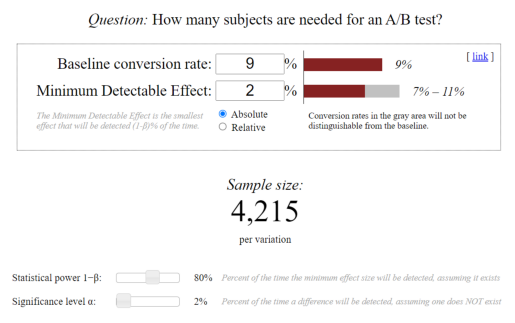

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/AB_hw2_sample size from calc.bmp'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # убирает оси координат
plt.show()

Размер выборки для каждой группы, рассчитанный в питоне, на 291 больше, чем результат, показанный калькулятором.

<font color='teal'>*8. Зайдите в [ноутбук](https://drive.google.com/file/d/1eZNK8T8oBznzHLVxdsYGVz-Oc5Ild6FP/view?usp=drive_link) и перезапустите код несколько раз, пока у вас не получиться график, который наглядно показывает, почему мы не можем останавливать эксперимент раньше времени, пришлите скриншот такого графика (для p-value от дня эксперимента).*
*Посмотрите на график и скажите на какой день эксперимента мы бы увидели, что наш эксперимент прокрасился (то есть результат эксперимента статистически значимый).*</font>

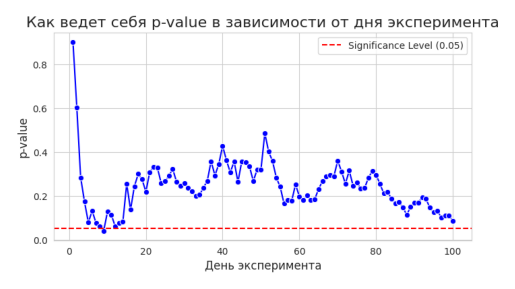

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/AB_hw2_p-value chart.png'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # убирает оси координат
plt.show()

Согласно графику, эксперимент прокрасился бы на приблизительно 8-ый или 9-ый день эксперимента, т.е. в самом его начале. Кажется, такой успех наблюдался бы единожды - лишь в пару другие дней p-value едва касается линии уровня значимости на графике, но не пересекает ее. Далее в течение оставшихся дней эксперимента (90+) наблюдаемые результаты и близко не приближаются к линии уровня значимости. Таким образом, при полноценно проведенном эксперименте значимые изменения не будут выявлены. Единственный "прокрашенный" день очевидно достиг якобы значимого изменения случайным образом, что подтверждается в диахронии.

<font color='teal'>*9. Если вы провели эксперимент вместе с продактом, но эксперимент не прокрасился. Продакт уверяет вас, что его фича классная, она точно должна повлиять на метрику. Просто ваш тест какой-то неправильный. Что вы можете предложить продукту в таком случае?*</font>

В первую очередь, нужно вежливо и доступно объяснить, что тест не обязательно сразу становится неправильным, если субъективная хотелка продакта не была подтверждена =) Считаю важным подчеркнуть, что тест обновывается на объективных данных, и возможно следует проанализировать разрабатываемую фичу, возможно, она нуждается в небольшой корректировке и доработке, которая потенциально могла бы повысить эффективность продукта.

Возможно, можно предложить повторное проведение эксперимента (в случае, если это будет адекватным решением, иначе это просто манипуляция данными и ожидание нужных результатов, как при проблеме подглядывания)? Например, проанализировать, корректно ли были сформулированы ключевые метрики. Возможно, была недоработка на этом этапе, и при корректировке новый тест уже даст иной результат.

Далее пусть продакт сам принимает решение под свою ответственность.


<font color='teal'>*10. Вы работаете в Facebook. Вы рассчитали размер выборки для вашего a/b-теста - 39,242 для каждой группы. Как долго вы будете проводить ваш a/b-тест? (Сколько дней?)?*</font>

Согласно данным, которые можно найти в интернете (например, [по этой ссылке](https://www.statista.com/statistics/346167/facebook-global-dau/)), количество ежедневных пользователей Facebook - DAU - в 4-м квартале 2023 года достигал 2.1 миллиарда. Очевидно, цифры на данный момент отличаются незначительно.

Таким образом, данные для 78,5 тысяч человек для обеих групп можно точно получить за один день, даже меньше. Тем не менее, для определения положительного эффекта новой фичи (или обратного результата) может быть целесообразно проводить тест в течение определенного периода времени, например, недели, чтобы проследить недельную сезонность и получить наиболее релевантные данные.